<a href="https://colab.research.google.com/github/angiecoronel12/Sleep_Stage/blob/main/01_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1. Analisis exploratorio de los datos

In [ ]:
# Importe de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

Los datos corresponden a caracteristicas de 10 sujetos diferentes para dos noches diferentes, estas fueron extraidas de una señal EEG fpz. Son 33 variables correspondientes a la caracterización en tiempo y frecuencia de la señal en epocas de 30s. En total se tienen ... epocas entre todos los sujetos

In [ ]:
# Carga de los datos ()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ajusta la ruta según la ubicación exacta de tu carpeta dentro de Google Drive
folder_path = '/content/drive/My Drive/Deep_learning_proyecto/Signals_10_subjects'
files = os.listdir(folder_path)
print(files)

['caracteristicas_S14.csv', 'caracteristicas_S4.csv', 'caracteristicas_S12.csv', 'caracteristicas_S1.csv', 'caracteristicas_S6.csv', 'caracteristicas_S10.csv', 'caracteristicas_S11.csv', 'caracteristicas_S5.csv', 'caracteristicas_S9.csv', 'caracteristicas_S3.csv', 'caracteristicas_S15.csv', 'caracteristicas_S16.csv', 'caracteristicas_S8.csv', 'caracteristicas_S7.csv', 'caracteristicas_S2.csv', 'caracteristicas_S13.csv', 'caracteristicas_S19.csv', 'caracteristicas_S18.csv', 'caracteristicas_S20.csv', 'caracteristicas_S17.csv']


In [ ]:
# Lista para almacenar los DataFrames
data_frames = []

# Bucle para cargar cada archivo
for i in range(1, 21):  # 20 noches de registro
    file_name = f'caracteristicas_S{i}.csv'
    file_path = os.path.join(folder_path, file_name)

    # Comprobar si el archivo existe antes de intentar cargarlo
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        data_frames.append(df)  # Agregar el DataFrame a la lista
    else:
        print(f'Archivo no encontrado: {file_name}')

# Opcional: verificar uno de los DataFrames cargados
if data_frames:  # Asegurarse de que la lista no está vacía
    print(data_frames[0].head())  # Mostrar las primeras filas del primer DataFrame

   RMS_Signal  Median_Signal   Std_Signal  Skewness_Signal  Kurtosis_Signal  \
0   25.178022      -0.750183  2204.801200         0.323722         3.824483   
1   11.674725      -0.234432   542.050135         1.189569         6.223080   
2    9.799267       0.890842   256.789178        -0.388191         3.841920   
3    8.767766       0.609524   229.704240         0.429741         6.359420   
4    6.892308       0.328205   115.284366         0.112610         3.302956   

    Amplitude        P75        E_SWA      E_Delta  Rel_delta  ...  \
0  282.631502  21.427106  4977.302857  5609.531040   0.508993  ...   
1  178.262271  11.346520   680.395001   859.888213   0.205634  ...   
2  113.652747  10.315018  1325.960595  1569.245071   0.466758  ...   
3  154.912821   8.580220   660.926654   775.002387   0.180237  ...   
4   79.238095   7.173626   282.953510   419.137454   0.391656  ...   

   Ratio_alpha_beta  SEF95_Delta  SEF95_Theta  SEF95_Alpha  SEF95_Beta  \
0          0.586462     2.8713

In [ ]:
print(f'Número de DataFrames en la lista: {len(data_frames)}')

Número de DataFrames en la lista: 20


Grafica el hipnograma de un sujeto, que es su etiqueta de salida!

## Estadistica descriptiva; Grafico pair-plot

In [ ]:
data_s1 = data_frames[0]
print(data_s1.head())

   RMS_Signal  Median_Signal   Std_Signal  Skewness_Signal  Kurtosis_Signal  \
0   25.178022      -0.750183  2204.801200         0.323722         3.824483   
1   11.674725      -0.234432   542.050135         1.189569         6.223080   
2    9.799267       0.890842   256.789178        -0.388191         3.841920   
3    8.767766       0.609524   229.704240         0.429741         6.359420   
4    6.892308       0.328205   115.284366         0.112610         3.302956   

    Amplitude        P75        E_SWA      E_Delta  Rel_delta  ...  \
0  282.631502  21.427106  4977.302857  5609.531040   0.508993  ...   
1  178.262271  11.346520   680.395001   859.888213   0.205634  ...   
2  113.652747  10.315018  1325.960595  1569.245071   0.466758  ...   
3  154.912821   8.580220   660.926654   775.002387   0.180237  ...   
4   79.238095   7.173626   282.953510   419.137454   0.391656  ...   

   Ratio_alpha_beta  SEF95_Delta  SEF95_Theta  SEF95_Alpha  SEF95_Beta  \
0          0.586462     2.8713

In [ ]:
# Con los datos de un sujeto
sns.set(style="ticks", color_codes=True)

# Crear un pairplot
# Asumimos que la última columna contiene las etiquetas
pairplot = sns.pairplot(data_s1, hue=data_s1.columns[-1])

plt.show()

## Hipnograma de todos los sujetos

Fases del sueño descripcion;

* "W" -----> Wakefullness
* "R" -----> REM (Rapid Eye Movement)
* "1" -----> NREM 1 (No Rapid Eye Movement-transicion sleep)
* "2" -----> NREM 2 (No Rapid Eye Movement-Light sleep)
* "3" -----> NREM 3 (No Rapid Eye Movement-Deep sleep)

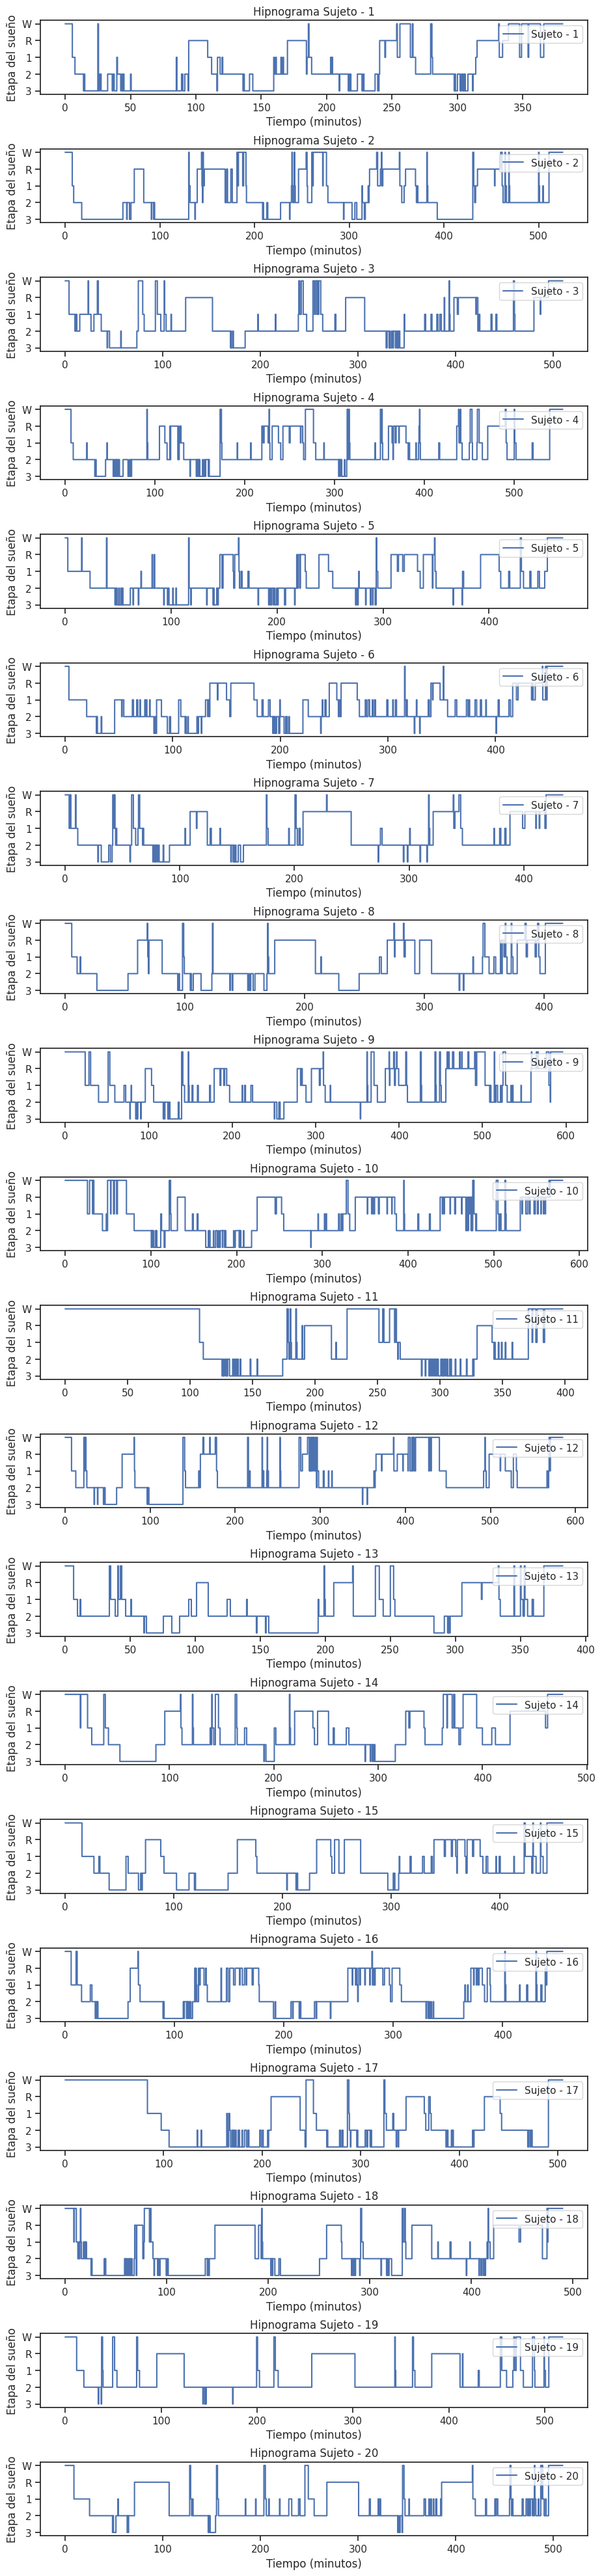

In [ ]:
# Configuración inicial
num_subjects = len(data_frames)  # Número de sujetos o DataFrames
fig, axes = plt.subplots(nrows=num_subjects, ncols=1, figsize=(10, 2 * num_subjects))  # Ajusta el tamaño como sea necesario
fig.tight_layout(pad=3.0)  # Ajusta el espaciamiento entre gráficos

# Mapeo de las etapas de sueño
stage_mapping = {'3': 0, '2': -1, '1': -2, 'R': -3, 'W': -4}

# Graficar cada hipnograma
for i, df in enumerate(data_frames):
    # Obtener los datos de la última columna y mapearlos
    hipnogram_data = df.iloc[:, -1].map(stage_mapping)
    time_vector = pd.Series(range(len(hipnogram_data))) * 30 / 60  # Tiempo en minutos

    # Configurar el subplot correspondiente
    ax = axes[i] if num_subjects > 1 else axes  # Ajustar para el caso de un solo subplot
    ax.plot(time_vector, hipnogram_data, drawstyle='steps-post', label=f'Sujeto - {i + 1}')
    ax.set_yticks(list(stage_mapping.values()))
    ax.set_yticklabels(list(stage_mapping.keys()))
    ax.invert_yaxis()  # Invertir eje Y
    ax.set_title(f'Hipnograma Sujeto - {i + 1}')
    ax.set_xlabel('Tiempo (minutos)')
    ax.set_ylabel('Etapa del sueño')
    ax.legend(loc='upper right')

# Mostrar el gráfico completo
plt.show()